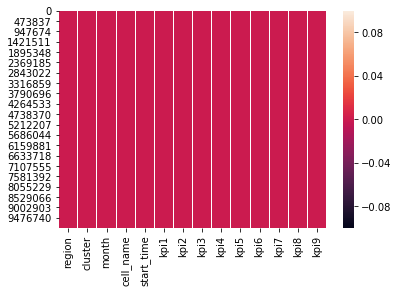

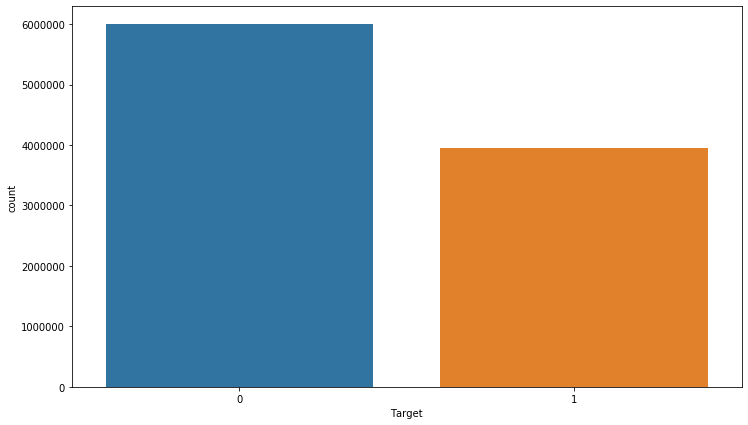

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

KPI = pd.read_csv('../Train/kpi_data_to_share_train_raw.csv') 
NPS = pd.read_csv('../Train/nps_data_to_share_train.csv')

NPS['Target'] = np.where(NPS['nps_values'] <= 0.1, 1, 0)
result = pd.merge(KPI, NPS, on=['region', 'cluster', 'month'])

train = result.drop('start_time', axis=1)

sns.heatmap(KPI.isnull())
plt.figure(figsize=(12, 7))
sns.countplot(x='Target',data=train)
#sns.boxplot(x='kpi1',y='Age',data=KPI,palette='winter')

X_train, X_test, y_train, y_test = train_test_split(train.drop(['nps_values','Target'],axis=1), 
train['Target'], test_size=0.30, random_state=101)

from sklearn.linear_model import LogisticRegression





In [54]:
#train.head()
X_train, X_test, y_train, y_test = train_test_split(train.drop(['nps_values','Target'],axis=1), 
train['Target'], test_size=0.30, random_state=101)

In [3]:
logmodel = LogisticRegression()
#logmodel = LogisticRegression(random_state=0, class_weight='balanced')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.79      0.73      0.76   1798997
           1       0.63      0.71      0.67   1186174

    accuracy                           0.72   2985171
   macro avg       0.71      0.72      0.72   2985171
weighted avg       0.73      0.72      0.72   2985171



In [4]:
logmodel.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

0    5995082
1    3955485
Name: Target, dtype: int64

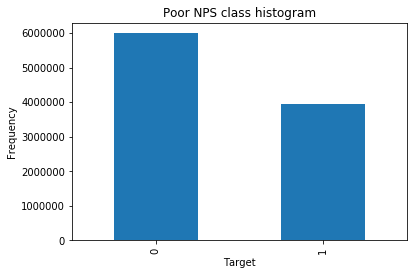

In [7]:
pd.value_counts(train['Target']).plot.bar()
plt.title('Poor NPS class histogram')
plt.xlabel('Target')
plt.ylabel('Frequency')
train['Target'].value_counts()

## Logistic regression - binary classifier

In [9]:


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

lr = LogisticRegression()

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 16.3min finished
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [10]:
clf.best_params_

{'C': 2.0}

In [55]:
lr1 = LogisticRegression(C=2, verbose=5)#,penalty='l1', verbose=5)
#lr1 = LogisticRegression(C=1, penalty='l1', verbose=5) # L1 regularization - F1 score =1
lr1.fit(X_train,y_train)
predictions = lr1.predict(X_test)
print(classification_report(y_test,predictions))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]              precision    recall  f1-score   support

           0       0.76      0.80      0.78   1798997
           1       0.66      0.61      0.64   1186174

    accuracy                           0.72   2985171
   macro avg       0.71      0.70      0.71   2985171
weighted avg       0.72      0.72      0.72   2985171



In [56]:
X_test.head()

region  cluster  month  cell_name   kpi1   kpi2   kpi3    kpi4  \
436611        0       17      7       6020  100.0   1.09  45.60  2.1420   
7339634       3      193      5      16765  100.0  12.54  81.39  5.2822   
801994        0       56      4       3764  100.0   0.24  15.57  3.6108   
631488        0       35      5      16101  100.0  11.62  87.79  1.2477   
1675643       2        2      3      27430  100.0   4.19  33.84  7.2866   

           kpi5    kpi6  kpi7  kpi8  kpi9  
436611   0.9518   99.88   0.0    21    10  
7339634  1.6945   99.98   0.0   156   115  
801994   1.1166  100.00   0.0    12     3  
631488   0.6078   99.90   0.0    96    70  
1675643  6.7360   99.91   0.0    29    15

In [42]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 61.25946128838545%


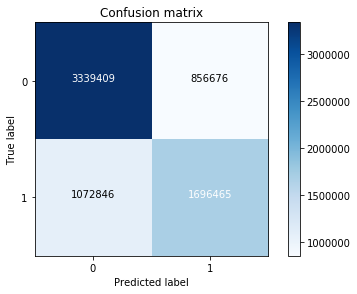

In [57]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')#, normalize=True)
plt.show()

Recall metric in the testing dataset: 61.27962676639346%


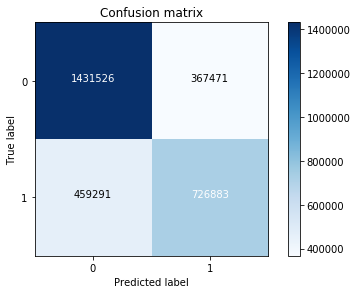

In [58]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [86]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(recall_score(y_test, y_pre, average='weighted'))
print(precision_score(y_test, y_pre, average='weighted'))

0.7230436715350644
0.7201867430038124


In [21]:
tmp = lr1.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

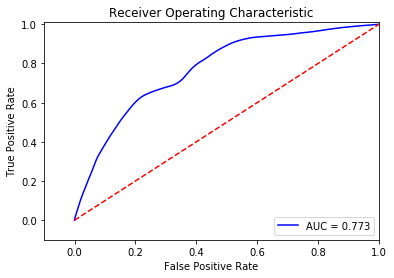

In [22]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
# Predict on given test data set
KPI = pd.read_csv('../Test/kpi_data_to_share_test_raw.csv') 
KPI_test = KPI.drop('start_time', axis=1)
print (KPI_test.head(2))
#NPS = pd.read_csv('../Train/nps_data_to_share_train.csv')

#NPS['Target'] = np.where(NPS['nps_values'] <= 0.1, 1, 0)
#result = pd.merge(KPI, NPS, on=['region', 'cluster', 'month'])

#train = result.drop('start_time', axis=1)

#sns.heatmap(KPI.isnull())
#plt.figure(figsize=(12, 7))
#sns.countplot(x='Target',data=train)

   region  cluster  month  cell_name   kpi1  kpi2   kpi3    kpi4    kpi5  \
0       0       18      8      10393  100.0  8.83  97.06  7.5226  0.9201   
1       0       18      8       5150  100.0  3.53  63.49  3.9283  0.9216   

    kpi6  kpi7  kpi8  kpi9  
0  99.89  1.27    34    17  
1  99.95  0.07    68    39  


In [68]:
#y_out
y_out = lr1.predict(KPI_test)
o = pd.DataFrame(y_out)
o.columns = ['Target_out']
KPI_test=KPI_test.join(o)
KPI_test.to_csv('../Test/result.csv')


In [69]:
KPI_test.head()

region  cluster  month  cell_name   kpi1  kpi2   kpi3     kpi4    kpi5  \
0       0       18      8      10393  100.0  8.83  97.06   7.5226  0.9201   
1       0       18      8       5150  100.0  3.53  63.49   3.9283  0.9216   
2       0       18      8       3258  100.0  1.87  19.54  12.0065  1.4740   
3       0       18      8      21065  100.0  5.49  57.76   7.8838  1.1642   
4       0       18      8      12282  100.0  9.57  73.27   7.9044  0.7635   

     kpi6  kpi7  kpi8  kpi9  Target_out  
0   99.89  1.27    34    17           1  
1   99.95  0.07    68    39           1  
2   99.81  0.02    33    17           1  
3  100.00  0.02    43    26           1  
4   99.96  0.04    86    58           1

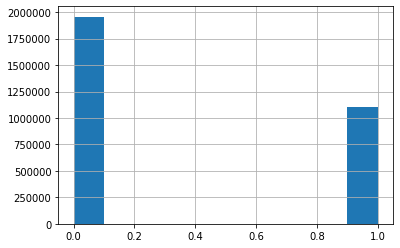

In [70]:
KPI_test['Target_out'].hist()

In [72]:
KPI_test[['region','cluster','month','Target_out']].to_csv('../Test/result_submit.csv',index=False)

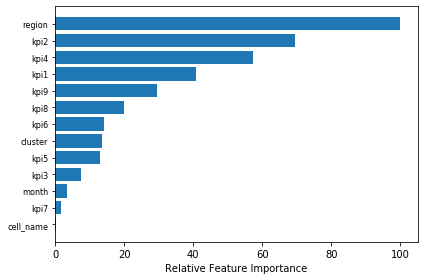

In [74]:
feature_importance = abs(lr1.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [77]:
feature_importance[sorted_idx]
list(np.array(X_train.columns)[sorted_idx])

['cell_name',
 'kpi7',
 'month',
 'kpi3',
 'kpi5',
 'cluster',
 'kpi6',
 'kpi8',
 'kpi9',
 'kpi1',
 'kpi4',
 'kpi2',
 'region']

## XGBoost based model

In [78]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
xgb_model.fit( X_train,y_train)
predictions = xgb_model.predict(X_test)
print(classification_report(y_test,predictions))

[15:29:59] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
              precision    recall  f1-score   support

           0       0.89      0.81      0.85   1798997
           1       0.75      0.85      0.79   1186174

    accuracy                           0.82   2985171
   macro avg       0.82      0.83      0.82   2985171
weighted avg       0.83      0.82      0.83   2985171



In [80]:
xgb_model.feature_importances_

array([7.0709431e-01, 9.1249421e-02, 2.6498131e-02, 1.4309429e-01,
       0.0000000e+00, 6.7336531e-03, 4.2986547e-04, 7.5495238e-03,
       0.0000000e+00, 1.7350774e-02, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00], dtype=float32)

In [81]:
predictions

array([1, 0, 1, ..., 1, 0, 1])

In [83]:
from sklearn.metrics import recall_score
#precision, recall, _ = precision_recall_curve(y_test, y_score)
recall_score(y_test, predictions, average='weighted')

0.8246475662533235

In [84]:
from sklearn.metrics import precision_score
#precision, recall, _ = precision_recall_curve(y_test, y_score)
precision_score(y_test, predictions, average='weighted')

0.8326960393568862

In [88]:
KPI_test=KPI_test.drop('Target_out',axis=1)
y_out_xg = xgb_model.predict(KPI_test)
o = pd.DataFrame(y_out_xg)
o.columns = ['Target_out']
KPI_test=KPI_test.join(o)
#KPI_test.to_csv('../Test/result_xgb.csv')

In [89]:
#KPI_test=KPI_test.drop('Target_out',axis=1)
#.head()
KPI_test[['region','cluster','month','Target_out']].to_csv('../Test/result_xgb.csv',index=False)